In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
df_extracted_aod055 = pd.read_csv(r'../data/df_extracted_aod055.csv')
del(df_extracted_aod055['row'])
del(df_extracted_aod055['col'])
del(df_extracted_aod055['tile_id'])

df_extracted_dem = pd.read_csv(r'../data/df_extracted_dem.csv')
del(df_extracted_dem['row'])
del(df_extracted_dem['col'])


gdf_openaq = gpd.read_file('../data/gdf_openaq.gpkg')
print('gdf_openaq has been loaded.')
if gdf_openaq.index.name is None:
    gdf_openaq = gdf_openaq.set_index('measurement_id')

gdf_openaq has been loaded.


In [9]:
gdf_openaq = gdf_openaq[gdf_openaq['value'] != -999].copy()


gdf_openaq

,locationId,location,parameter,value,unit,country,city,isMobile,isAnalysis,entity,sensorType,lat,long,datetime,year,month,geometry
measurement_id,,,,,,,,,,,,,,,,,
0,8893,Vientiane,pm25,10.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-30 00:00:00+00:00,2019,6,POINT (102.64000 17.89612)
1,8893,Vientiane,pm25,18.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-29 23:00:00+00:00,2019,6,POINT (102.64000 17.89612)
2,8893,Vientiane,pm25,17.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-29 22:00:00+00:00,2019,6,POINT (102.64000 17.89612)
3,8893,Vientiane,pm25,12.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-29 21:00:00+00:00,2019,6,POINT (102.64000 17.89612)
4,8893,Vientiane,pm25,15.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-29 20:00:00+00:00,2019,6,POINT (102.64000 17.89612)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218204,2694254,Soi Kheha Pattana 1,pm25,39.079167,µg/m³,TH,NaN,False,NaN,Private Organization,low-cost sensor,13.709941,100.576022,2024-04-02 04:00:00+00:00,2024,4,POINT (100.57602 13.70994)
218205,2694254,Soi Kheha Pattana 1,pm25,39.387797,µg/m³,TH,NaN,False,NaN,Private Organization,low-cost sensor,13.709941,100.576022,2024-04-02 03:00:00+00:00,2024,4,POINT (100.57602 13.70994)
218206,2694254,Soi Kheha Pattana 1,pm25,37.445286,µg/m³,TH,NaN,False,NaN,Private Organization,low-cost sensor,13.709941,100.576022,2024-04-02 02:00:00+00:00,2024,4,POINT (100.57602 13.70994)


In [11]:
df_extracted_aod055 = df_extracted_aod055[df_extracted_aod055['aod_055'] >= 0].copy()
df_extracted_aod055 = df_extracted_aod055.set_index('measurement_id')
df_extracted_aod055

,aod_055,aod_datetime
measurement_id,,
4127,185.0,2019-12-11 03:40:00+00:00
4128,185.0,2019-12-11 03:40:00+00:00
12436,63.0,2021-01-10 07:10:00+00:00
12437,63.0,2021-01-10 07:10:00+00:00
66393,241.0,2021-06-14 03:50:00+00:00
...,...,...
39388,266.0,2021-05-20 03:50:00+00:00
45181,368.0,2021-05-20 03:50:00+00:00
45182,368.0,2021-05-20 03:50:00+00:00


In [12]:
df_extracted_dem = df_extracted_dem.copy()
df_extracted_dem = df_extracted_dem.set_index('measurement_id')
df_extracted_dem

,dem
measurement_id,
0,174.0
1,174.0
2,174.0
3,174.0
4,174.0
...,...
205085,23.0
205086,23.0
205087,23.0


In [14]:
df_joined = gdf_openaq.merge(df_extracted_aod055, how='inner', left_index=True, right_index=True).copy()
df_joined = df_joined.merge(df_extracted_dem, how='inner', left_index=True, right_index=True).copy()
df_joined = df_joined.rename(columns={'value':'pm25'})
df_joined

,locationId,location,parameter,pm25,unit,country,city,isMobile,isAnalysis,entity,sensorType,lat,long,datetime,year,month,geometry,aod_055,aod_datetime,dem
measurement_id,,,,,,,,,,,,,,,,,,,,
184,8893,Vientiane,pm25,5.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-22 04:00:00+00:00,2019,6,POINT (102.64000 17.89612),149.0,2019-06-22 03:15:00+00:00,174.0
185,8893,Vientiane,pm25,8.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-22 03:00:00+00:00,2019,6,POINT (102.64000 17.89612),149.0,2019-06-22 03:15:00+00:00,174.0
204,8893,Vientiane,pm25,4.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-21 08:00:00+00:00,2019,6,POINT (102.64000 17.89612),187.0,2019-06-21 07:15:00+00:00,174.0
205,8893,Vientiane,pm25,2.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-21 07:00:00+00:00,2019,6,POINT (102.64000 17.89612),187.0,2019-06-21 07:15:00+00:00,174.0
207,8893,Vientiane,pm25,4.000000,µg/m³,TH,NaN,False,NaN,Governmental Organization,reference grade,17.896122,102.640000,2019-06-21 05:00:00+00:00,2019,6,POINT (102.64000 17.89612),43.0,2019-06-21 04:15:00+00:00,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218166,2692645,Vibhavadi Rangsit 11 Alley Lane 10,pm25,41.082341,µg/m³,TH,NaN,False,NaN,Private Organization,low-cost sensor,13.824551,100.550283,2024-04-02 08:00:00+00:00,2024,4,POINT (100.55028 13.82455),206.0,2024-04-02 07:40:00+00:00,7.0
218167,2692645,Vibhavadi Rangsit 11 Alley Lane 10,pm25,43.248809,µg/m³,TH,NaN,False,NaN,Private Organization,low-cost sensor,13.824551,100.550283,2024-04-02 07:00:00+00:00,2024,4,POINT (100.55028 13.82455),206.0,2024-04-02 07:40:00+00:00,7.0
218170,2692645,Vibhavadi Rangsit 11 Alley Lane 10,pm25,43.476191,µg/m³,TH,NaN,False,NaN,Private Organization,low-cost sensor,13.824551,100.550283,2024-04-02 04:00:00+00:00,2024,4,POINT (100.55028 13.82455),470.0,2024-04-02 03:45:00+00:00,7.0


<Axes: xlabel='dem', ylabel='pm25'>

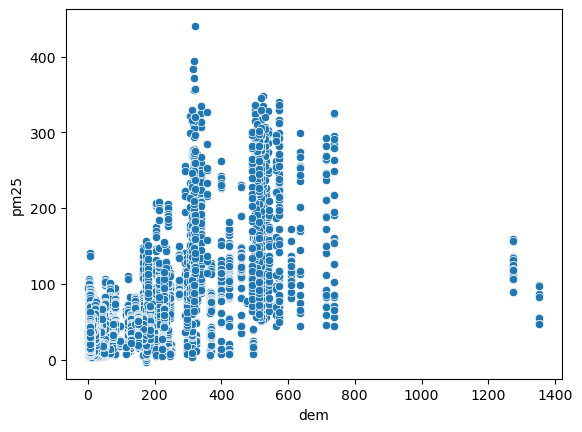

In [16]:
sns.scatterplot(data=df_joined, x='dem', y='pm25')

<Axes: xlabel='aod_055', ylabel='pm25'>

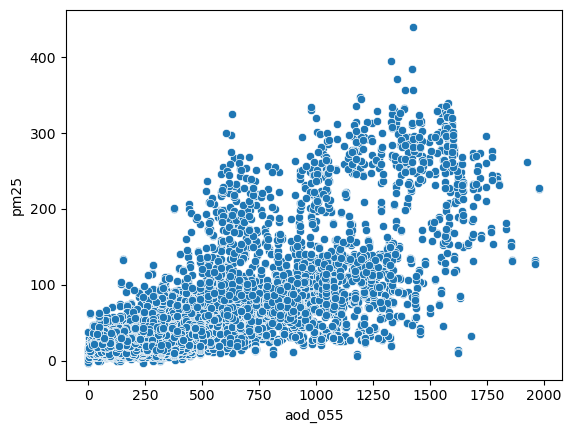

In [15]:
sns.scatterplot(data=df_joined, x='aod_055', y='pm25')

In [17]:
df_pm25 = df_joined.reindex(columns=['pm25', 'aod_055', 'dem']).copy()
df_pm25

,pm25,aod_055,dem
measurement_id,,,
184,5.000000,149.0,174.0
185,8.000000,149.0,174.0
204,4.000000,187.0,174.0
205,2.000000,187.0,174.0
207,4.000000,43.0,174.0
...,...,...,...
218166,41.082341,206.0,7.0
218167,43.248809,206.0,7.0
218170,43.476191,470.0,7.0


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Load your sample DataFrame (replace with your actual data)
# Assuming your DataFrame is named 'df' and contains columns 'pm25', 'aod_055', and 'dem'
# You can replace the sample data with your actual data


# Define features (X) and target (y)
X = df_pm25[['aod_055', 'dem']]
y = df_pm25['pm25']

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, verbose=2, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Print messages
print("Random Forest model training completed.")
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best mean squared error on test set: {mse:.2f}")


KeyboardInterrupt: 